In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn import datasets, metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fruits_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/fruits')
cat_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/cat')
dog_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/dog')
beach_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/beach')
bill_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bill')
bookjacket_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bookjacket')
car_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/car')
clothes_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/clothes')
drink_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/drink')
feast_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/feast')
field_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/field')
flower_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/flower')
food_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/food')
house_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/house')
jewels_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/jewels')
motorcycle_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/motorcycle')
mountain_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/mountain')
papers_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/papers')
person_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/person')
shoe_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/shoe')
truck_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/truck')

In [ ]:
print('Total training fruits images:', len(os.listdir(fruits_dir)))
print('Total training cat images:', len(os.listdir(cat_dir)))
print('Total training dog images:', len(os.listdir(dog_dir)))
print('Total training beach images:', len(os.listdir(beach_dir)))
print('Total training bill images:', len(os.listdir(bill_dir)))
print('Total training bookjacket images:', len(os.listdir(bookjacket_dir)))
print('Total training car images:', len(os.listdir(car_dir)))
print('Total training clothes images:', len(os.listdir(clothes_dir)))
print('Total training drink images:', len(os.listdir(drink_dir)))
print('Total training feast images:', len(os.listdir(feast_dir)))
print('Total training field images:', len(os.listdir(field_dir)))
print('Total training flower images:', len(os.listdir(flower_dir)))
print('Total training food images:', len(os.listdir(food_dir)))
print('Total training house images:', len(os.listdir(house_dir)))
print('Total training jewels images:', len(os.listdir(jewels_dir)))
print('Total training motorcycle images:', len(os.listdir(motorcycle_dir)))
print('Total training mountain images:', len(os.listdir(mountain_dir)))
print('Total training papers images:', len(os.listdir(papers_dir)))
print('Total training person images:', len(os.listdir(person_dir)))
print('Total training shoe images:', len(os.listdir(shoe_dir)))
print('Total training truck images:', len(os.listdir(truck_dir)))

Total training fruits images: 157
Total training cat images: 316
Total training dog images: 293
Total training beach images: 287
Total training bill images: 108
Total training bookjacket images: 217
Total training car images: 114
Total training clothes images: 188
Total training drink images: 167
Total training feast images: 110
Total training field images: 126
Total training flower images: 276
Total training food images: 218
Total training house images: 111
Total training jewels images: 117
Total training motorcycle images: 211
Total training mountain images: 107
Total training papers images: 125
Total training person images: 184
Total training shoe images: 355
Total training truck images: 149


In [ ]:
imagePaths = ['beach', 'bill', 'bookjacket', 'car', 'cat', 'clothes', 'dog', 'drink','feast', 'field', 'flower', 'food', 'fruits', 'house', 'jewels', 'motorcycle', 'mountain', 'papers', 'person', 'shoe', 'truck']

### training with size 124*124

In [ ]:
# load data train
data_train=[]
labels_train=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+img+'/'+i)
        image = cv2.resize(image, (124, 124))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print('total file train:',len(data_train)) # print total image in data train

# load data test
data_test=[]
labels_test=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+img+'/'+i)
        image = cv2.resize(image, (124, 124))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print('total file test:',len(data_test)) # print total image in data test

total file train: 3936
total file test: 600


In [ ]:
## model inceptionV3 with size 124*124
ict_model = InceptionV3(input_shape=[124, 124, 3], weights='imagenet', include_top=False)


for layer in ict_model.layers:
    layer.trainable = False

x = Flatten()(ict_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(21, activation='softmax')(x)

model = Model(inputs=ict_model.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 124, 124, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 61, 61, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 61, 61, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('inceptionV3_124.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

In [ ]:
%%time
result = model.fit(
               datagen.flow(data_train, labels_train, batch_size=150),
               epochs=10,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.00106, saving model to inceptionV3_124.h5
27/27 - 46s - loss: 3.3825 - accuracy: 0.4972 - val_loss: 1.0011 - val_accuracy: 0.7637 - lr: 0.0010 - 46s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 1.00106 to 0.54815, saving model to inceptionV3_124.h5
27/27 - 27s - loss: 0.9020 - accuracy: 0.7922 - val_loss: 0.5482 - val_accuracy: 0.8549 - lr: 0.0010 - 27s/epoch - 1s/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.54815 to 0.48675, saving model to inceptionV3_124.h5
27/27 - 27s - loss: 0.6658 - accuracy: 0.8323 - val_loss: 0.4868 - val_accuracy: 0.8740 - lr: 0.0010 - 27s/epoch - 991ms/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.48675 to 0.31063, saving model to inceptionV3_124.h5
27/27 - 27s - loss: 0.4631 - accuracy: 0.8702 - val_loss: 0.3106 - val_accuracy: 0.9098 - lr: 0.0010 - 27s/epoch - 993ms/step
Epoch 5/10

Epoch 00005: val_loss improved from 0.31063 to 0.29859, saving model to inceptionV

In [ ]:
## test model
ypred_test = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred_test)):
    if np.argmax(ypred_test[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 460 	 wrongly-predicted-data:  140
Accuracy: 76.667 %


Text(0.5, 228.47999999999993, 'Predicted')

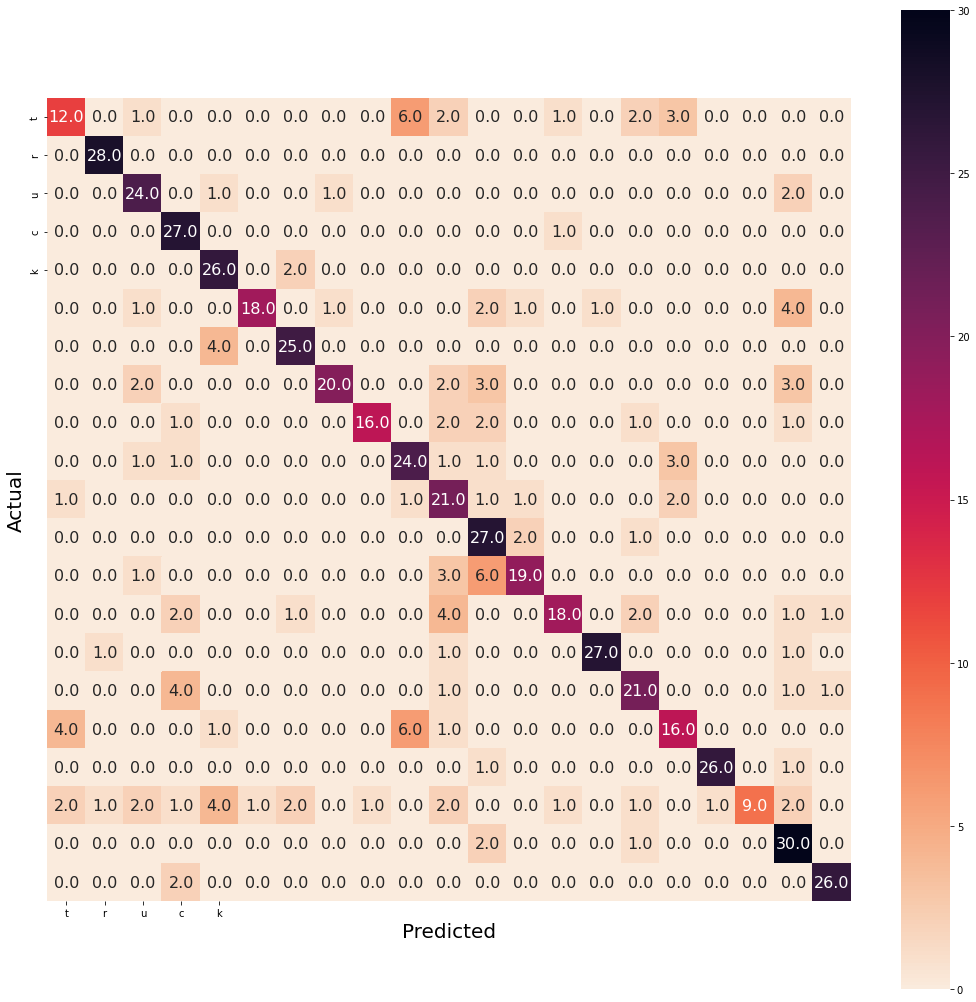

In [ ]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
from sklearn import datasets, metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Ytrue, Ypred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x7f15e02c2a90>:
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        27
           1       0.93      1.00      0.97        28
           2       0.75      0.86      0.80        28
           3       0.71      0.96      0.82        28
           4       0.72      0.93      0.81        28
           5       0.95      0.64      0.77        28
           6       0.83      0.86      0.85        29
           7       0.91      0.67      0.77        30
           8       0.94      0.70      0.80        23
           9       0.65      0.77      0.71        31
          10       0.53      0.78      0.63        27
          11       0.60      0.90      0.72        30
          12       0.83      0.66      0.73        29
          13       0.86      0.62      0.72        29
          14       0.96      0.90      0.93        30
          15       0.72      0.75  

### training with size 150*150


In [ ]:
# load data train
data_train=[]
labels_train=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+img+'/'+i)
        image = cv2.resize(image, (150, 150))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print('total file train:',len(data_train)) # print total image in data train

# load data test
data_test=[]
labels_test=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+img+'/'+i)
        image = cv2.resize(image, (150, 150))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print('total file test:',len(data_test)) # print total image in data test

total file train: 3936
total file test: 600


In [ ]:
## model inceptionV3 with size 150*150
ict_model = InceptionV3(input_shape=[150, 150, 3], weights='imagenet', include_top=False)


for layer in ict_model.layers:
    layer.trainable = False

x = Flatten()(ict_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(21, activation='softmax')(x)

model = Model(inputs=ict_model.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('inceptionV3_150.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

In [ ]:
%%time
## train model
result = model.fit(
               datagen.flow(data_train, labels_train, batch_size=150),
               epochs=10,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.18617, saving model to inceptionV3_150.h5
27/27 - 49s - loss: 4.6361 - accuracy: 0.5595 - val_loss: 1.1862 - val_accuracy: 0.8366 - lr: 0.0010 - 49s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 1.18617 to 0.44164, saving model to inceptionV3_150.h5
27/27 - 44s - loss: 0.9185 - accuracy: 0.8511 - val_loss: 0.4416 - val_accuracy: 0.9190 - lr: 0.0010 - 44s/epoch - 2s/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.44164 to 0.26019, saving model to inceptionV3_150.h5
27/27 - 44s - loss: 0.4613 - accuracy: 0.9098 - val_loss: 0.2602 - val_accuracy: 0.9385 - lr: 0.0010 - 44s/epoch - 2s/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.26019 to 0.21274, saving model to inceptionV3_150.h5
27/27 - 36s - loss: 0.4001 - accuracy: 0.9126 - val_loss: 0.2127 - val_accuracy: 0.9479 - lr: 0.0010 - 36s/epoch - 1s/step
Epoch 5/10

Epoch 00005: val_loss improved from 0.21274 to 0.17743, saving model to inceptionV3_150.

In [ ]:
## test model
ypred_test = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred_test)):
    if np.argmax(ypred_test[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 498 	 wrongly-predicted-data:  102
Accuracy: 83.0 %


Text(0.5, 228.47999999999993, 'Predicted')

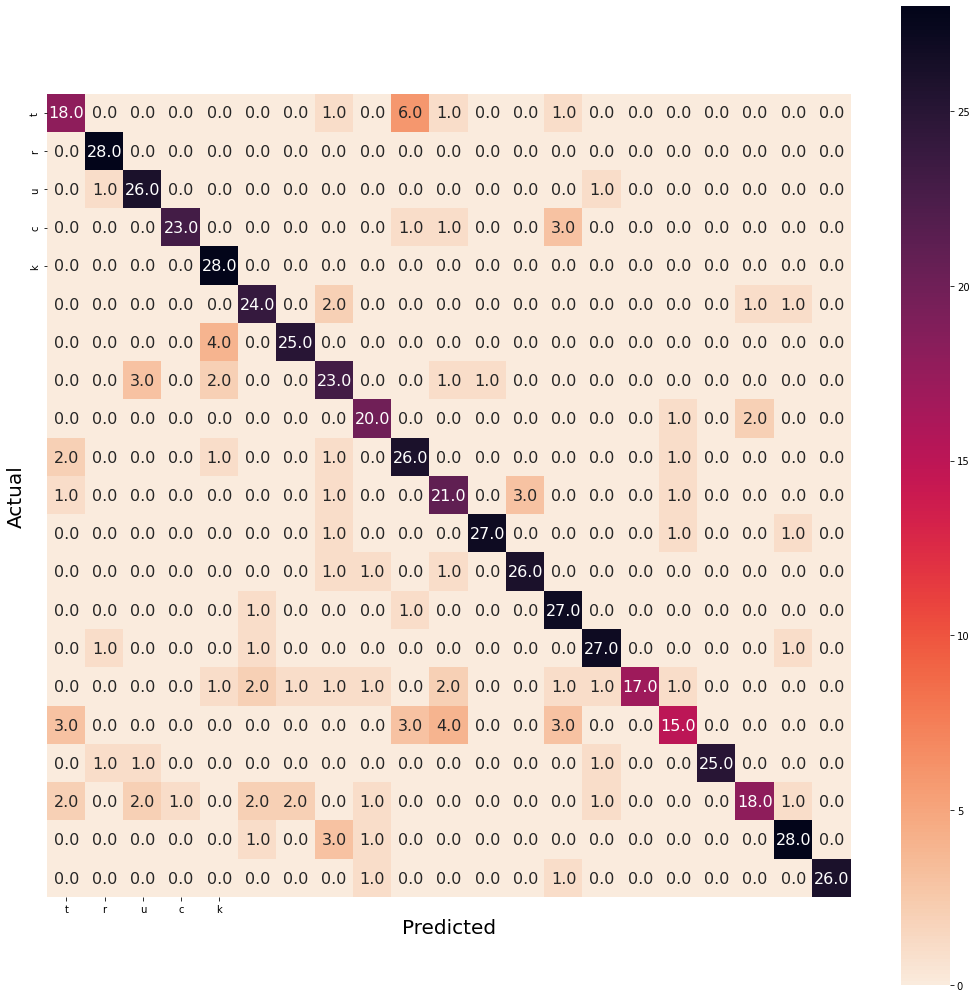

In [ ]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
from sklearn import datasets, metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Ytrue, Ypred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x7f156a460610>:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        27
           1       0.90      1.00      0.95        28
           2       0.81      0.93      0.87        28
           3       0.96      0.82      0.88        28
           4       0.78      1.00      0.88        28
           5       0.77      0.86      0.81        28
           6       0.89      0.86      0.88        29
           7       0.68      0.77      0.72        30
           8       0.80      0.87      0.83        23
           9       0.70      0.84      0.76        31
          10       0.68      0.78      0.72        27
          11       0.96      0.90      0.93        30
          12       0.90      0.90      0.90        29
          13       0.75      0.93      0.83        29
          14       0.87      0.90      0.89        30
          15       1.00      0.61  

### training with size 255*255

In [ ]:
# load data train
data_train=[]
labels_train=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+img+'/'+i)
        image = cv2.resize(image, (255, 255))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print('total file train:',len(data_train)) # print total image in data train

# load data test
data_test=[]
labels_test=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+img+'/'+i)
        image = cv2.resize(image, (255, 255))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print('total file test:',len(data_test)) # print total image in data test

total file train: 3936
total file test: 600


In [ ]:
## model inceptionV3 with size 255*255
ict_model = InceptionV3(input_shape=[255, 255, 3], weights='imagenet', include_top=False)


for layer in ict_model.layers:
    layer.trainable = False

x = Flatten()(ict_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(21, activation='softmax')(x)

model = Model(inputs=ict_model.input, outputs=prediction)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [ ]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('inceptionV3_255.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

In [ ]:
%%time
## train model
result = model.fit(
               datagen.flow(data_train, labels_train, batch_size=150),
               epochs=10,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

Epoch 1/10

Epoch 00001: val_loss improved from inf to 2.38011, saving model to inceptionV3_255.h5
27/27 - 114s - loss: 12.6523 - accuracy: 0.5069 - val_loss: 2.3801 - val_accuracy: 0.8382 - lr: 0.0010 - 114s/epoch - 4s/step
Epoch 2/10

Epoch 00002: val_loss improved from 2.38011 to 0.49645, saving model to inceptionV3_255.h5
27/27 - 95s - loss: 1.2508 - accuracy: 0.9004 - val_loss: 0.4965 - val_accuracy: 0.9472 - lr: 0.0010 - 95s/epoch - 4s/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.49645 to 0.19443, saving model to inceptionV3_255.h5
27/27 - 104s - loss: 0.4221 - accuracy: 0.9525 - val_loss: 0.1944 - val_accuracy: 0.9746 - lr: 0.0010 - 104s/epoch - 4s/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.19443 to 0.12048, saving model to inceptionV3_255.h5
27/27 - 95s - loss: 0.2475 - accuracy: 0.9665 - val_loss: 0.1205 - val_accuracy: 0.9787 - lr: 0.0010 - 95s/epoch - 4s/step
Epoch 5/10

Epoch 00005: val_loss improved from 0.12048 to 0.11467, saving model to inceptionV3

In [ ]:
## test model
ypred_test = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred_test)):
    if np.argmax(ypred_test[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 556 	 wrongly-predicted-data:  44
Accuracy: 92.667 %


Text(0.5, 228.47999999999993, 'Predicted')

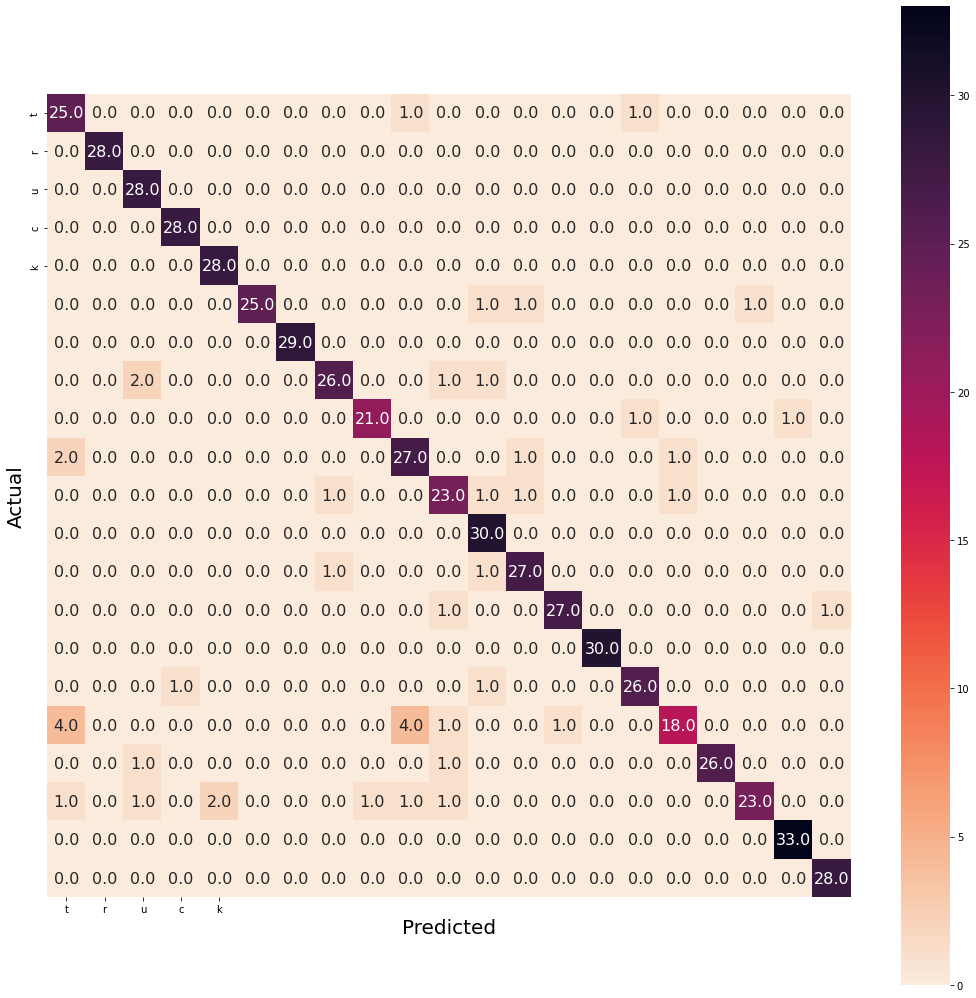

In [ ]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
from sklearn import datasets, metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Ytrue, Ypred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x7f1569e1b710>:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       1.00      1.00      1.00        28
           2       0.88      1.00      0.93        28
           3       0.97      1.00      0.98        28
           4       0.93      1.00      0.97        28
           5       1.00      0.89      0.94        28
           6       1.00      1.00      1.00        29
           7       0.93      0.87      0.90        30
           8       0.95      0.91      0.93        23
           9       0.82      0.87      0.84        31
          10       0.82      0.85      0.84        27
          11       0.86      1.00      0.92        30
          12       0.90      0.93      0.92        29
          13       0.96      0.93      0.95        29
          14       1.00      1.00      1.00        30
          15       0.93      0.93  

### training with size 224*224

In [ ]:
# load data train
data_train=[]
labels_train=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+img+'/'+i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print('total file train:',len(data_train)) # print total image in data train

# load data test
data_test=[]
labels_test=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+img+'/'+i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print('total file test:',len(data_test)) # print total image in data test

total file train: 3936
total file test: 600


In [ ]:
## model inceptionV3 with size 224*224
ict_model = InceptionV3(input_shape=[224, 224, 3], weights='imagenet', include_top=False)


for layer in ict_model.layers:
    layer.trainable = False

x = Flatten()(ict_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(21, activation='softmax')(x)

model = Model(inputs=ict_model.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('inceptionV3_255.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

In [ ]:
%%time
## train model
result = model.fit(
               datagen.flow(data_train, labels_train, batch_size=150),
               epochs=10,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.94717, saving model to inceptionV3_255.h5
27/27 - 113s - loss: 9.1354 - accuracy: 0.5442 - val_loss: 0.9472 - val_accuracy: 0.9024 - lr: 0.0010 - 113s/epoch - 4s/step
Epoch 2/10

Epoch 00002: val_loss improved from 0.94717 to 0.40337, saving model to inceptionV3_255.h5
27/27 - 75s - loss: 0.9375 - accuracy: 0.9042 - val_loss: 0.4034 - val_accuracy: 0.9464 - lr: 0.0010 - 75s/epoch - 3s/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.40337 to 0.19447, saving model to inceptionV3_255.h5
27/27 - 91s - loss: 0.3861 - accuracy: 0.9439 - val_loss: 0.1945 - val_accuracy: 0.9698 - lr: 0.0010 - 91s/epoch - 3s/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.19447 to 0.18419, saving model to inceptionV3_255.h5
27/27 - 90s - loss: 0.2327 - accuracy: 0.9619 - val_loss: 0.1842 - val_accuracy: 0.9634 - lr: 0.0010 - 90s/epoch - 3s/step
Epoch 5/10

Epoch 00005: val_loss improved from 0.18419 to 0.15078, saving model to inceptionV3_25

In [ ]:
## test model
ypred_test = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred_test)):
    if np.argmax(ypred_test[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 539 	 wrongly-predicted-data:  61
Accuracy: 89.833 %


Text(0.5, 228.47999999999993, 'Predicted')

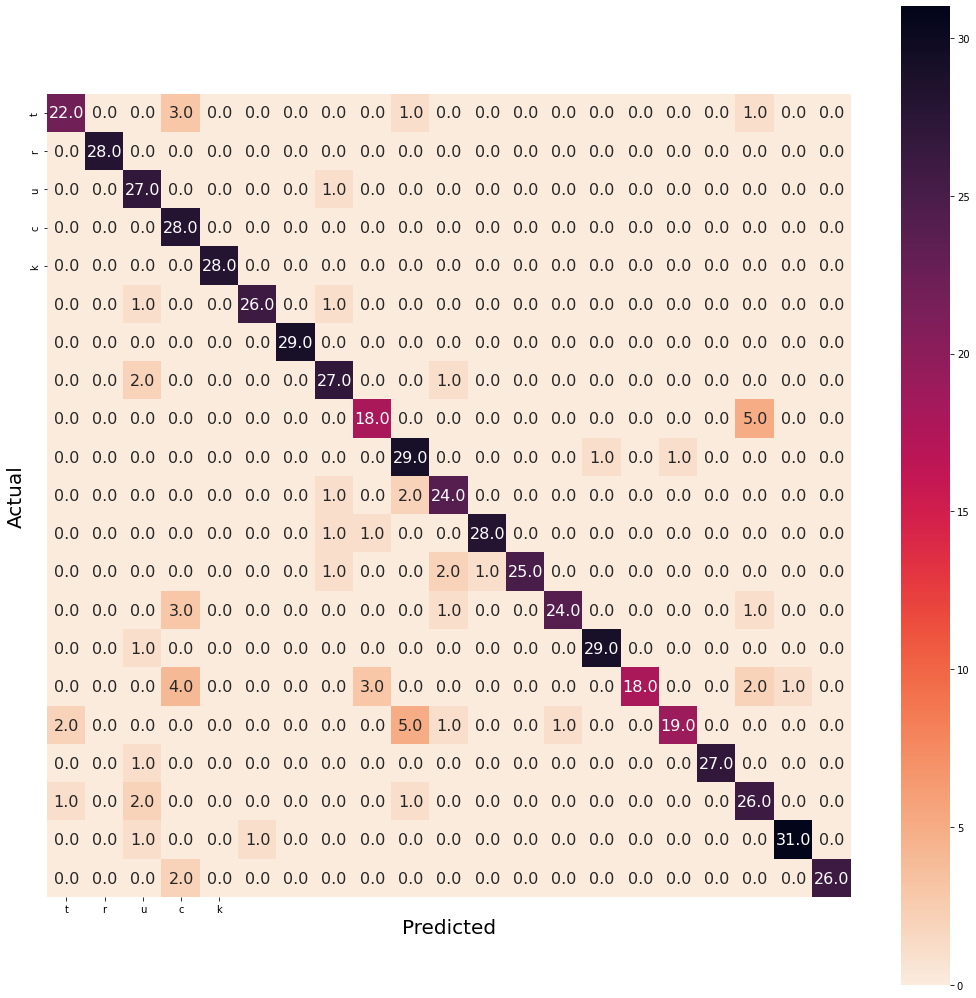

In [ ]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
from sklearn import datasets, metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Ytrue, Ypred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x7f83d00ba310>:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       1.00      1.00      1.00        28
           2       0.77      0.96      0.86        28
           3       0.70      1.00      0.82        28
           4       1.00      1.00      1.00        28
           5       0.96      0.93      0.95        28
           6       1.00      1.00      1.00        29
           7       0.84      0.90      0.87        30
           8       0.82      0.78      0.80        23
           9       0.76      0.94      0.84        31
          10       0.83      0.89      0.86        27
          11       0.97      0.93      0.95        30
          12       1.00      0.86      0.93        29
          13       0.96      0.83      0.89        29
          14       0.97      0.97      0.97        30
          15       1.00      0.64  